<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Start: 21st Aug
## End: 22nd Aug

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'
breast = pd.read_csv(breast_cancer_csv)

In [4]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. EDA 

Explore dataset. Check for nulls. Make the target column binary.

In [5]:
breast.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
breast.shape

(569, 33)

In [7]:
breast.drop(labels="Unnamed: 32", axis=1, inplace=True)

In [8]:
breast.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
breast_dummy = pd.get_dummies(data = breast, columns = ['diagnosis'],
                              prefix = ['diagnosis'])



breast_dummy.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


In [11]:
#define X variable
x = breast_dummy.iloc[:,1:11]
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [12]:
#define y variable
y = breast_dummy['diagnosis_M']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_M, Length: 569, dtype: uint8

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [13]:
#Build Model
reg = LogisticRegression()

#Fit Model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

reg.fit(x_train, y_train)

reg.score(x_train, y_train)

#Score

0.910761154855643

In [14]:
y_pred = reg.predict(x_test)

In [15]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=uint8)

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe. 

    index=['is_cancer', 'is_healthy']
    columns=['predicted_cancer','predicted_healthy']

In [19]:
# ANSWER
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

confuse = metrics.confusion_matrix(y_test, y_pred)
print(confuse)

[[112   9]
 [  3  64]]


In [20]:
confusion_matrix = pd.DataFrame(confuse, index=['is_cancer', 'is_healthy'], columns=['predicted_cancer','predicted_healthy'] )
print(confusion_matrix)

            predicted_cancer  predicted_healthy
is_cancer                112                  9
is_healthy                 3                 64


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [21]:
# ANSWER
# use float to perform true division, not integer division

TP = 64
TN = 112
FP = 9
FN = 3

Answer = (TP + TN) / float(TP + TN + FP + FN)
Answer

0.9361702127659575

In [22]:
metrics.accuracy_score(y_test, y_pred)

0.9361702127659575

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [23]:
# ANSWER
(FP + FN) / float(TP + TN + FP + FN)

0.06382978723404255

In [24]:
1 - metrics.accuracy_score(y_test, y_pred)

0.06382978723404253

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [25]:
# ANSWER- sensitivity is the total number of positive cases you have predicted correctly (recall)

all_positive = TP + FN
all_positive

67

In [26]:
sensitivity = TP/float(FN+TP)
sensitivity

0.9552238805970149

In [27]:
metrics.recall_score(y_test, y_pred)

0.9552238805970149

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [28]:
# ANSWER
all_negative = TN+FP
all_negative

121

In [29]:
specificity = TN/(TN+FP)
specificity

0.9256198347107438

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [30]:
# ANSWER
false_positive_rate = FP / float(TN + FP)
false_positive_rate

0.0743801652892562

In [31]:
1-specificity

0.07438016528925617

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [32]:
# ANSWER
precision = TP / float(TP + FP)
precision

0.8767123287671232

In [33]:
metrics.precision_score(y_test, y_pred)


0.8767123287671232

#### 3.10 Create a predicted test probability dataframe with column name 'class_0_pp','class_1_pp'

In [34]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)

reg.predict_proba(x_test)

array([[8.96252933e-01, 1.03747067e-01],
       [2.52674847e-02, 9.74732515e-01],
       [2.14168545e-01, 7.85831455e-01],
       [8.67812438e-01, 1.32187562e-01],
       [9.83811484e-01, 1.61885158e-02],
       [2.41287827e-05, 9.99975871e-01],
       [2.65948258e-04, 9.99734052e-01],
       [1.60061545e-01, 8.39938455e-01],
       [8.63880114e-01, 1.36119886e-01],
       [9.08649308e-01, 9.13506924e-02],
       [7.68375426e-01, 2.31624574e-01],
       [1.90160218e-01, 8.09839782e-01],
       [7.21803246e-01, 2.78196754e-01],
       [5.56155283e-02, 9.44384472e-01],
       [9.88949202e-01, 1.10507980e-02],
       [4.40571627e-04, 9.99559428e-01],
       [8.88580006e-01, 1.11419994e-01],
       [9.93092540e-01, 6.90745960e-03],
       [9.99943830e-01, 5.61701645e-05],
       [8.56352299e-04, 9.99143648e-01],
       [7.61811218e-01, 2.38188782e-01],
       [9.54146172e-01, 4.58538278e-02],
       [2.80390240e-04, 9.99719610e-01],
       [9.94498198e-01, 5.50180210e-03],
       [9.233776

In [35]:
y_pp = pd.DataFrame(reg.predict_proba(x_test), columns = ['class_0_pp','class_1_pp'])

In [36]:
y_pp

,class_0_pp,class_1_pp
0,0.896253,0.103747
1,0.025267,0.974733
2,0.214169,0.785831
3,0.867812,0.132188
4,0.983811,0.016189
...,...,...
183,0.283745,0.716255
184,0.045785,0.954215
185,0.465532,0.534468
186,0.126392,0.873608


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [37]:
from sklearn.metrics import roc_curve, auc

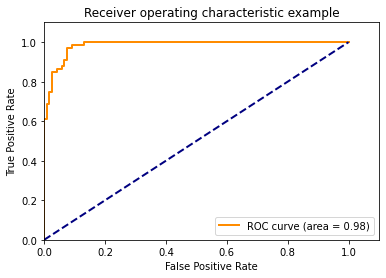

In [38]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = reg.predict_proba(x_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



